## Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking for Nullls or Missing values

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Thank fully there is no missing value in this data.

In [4]:
#lets check for the shape of data
df.shape

(1338, 7)

there are 1338 rowas and 7 columns . now check for datatypes of the columns

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


since there are 3 columns (sex ,smoker,region) are of object data type as we know python understand only numbers so we need to convert these object data type into float/int datatype.

In [6]:
df.columns #show all the columns in the dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Converting objet dataype  into float/int

In [7]:
df_exclude_numeric = df.select_dtypes(exclude=np.number).columns # df with categorical data only

In [8]:
df[df_exclude_numeric].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
df_exclude_numeric

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
#Converting Categorical values to Numerical
lab_enc=LabelEncoder()


In [11]:
for i in df_exclude_numeric:
    df[i] = lab_enc.fit_transform(df[i])
print("Encoded data")
df.head()

Encoded data


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
df.describe() #checking the statistics of the dataset

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Observatons-
Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

there is no sign of outlier as most of the datapoints as at almost same or equal distance

### Plotting heatmap to check correlation

In [14]:
df_corr=df.corr()
print(df_corr)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


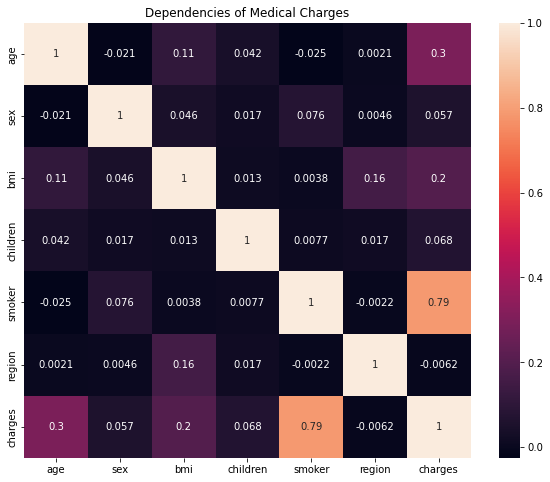

In [15]:
#plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data=df_corr,annot=True,annot_kws={'size':10})
plt.title("Dependencies of Medical Charges")
plt.show()

#### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

### Explolatery Data Analysis(EDA)

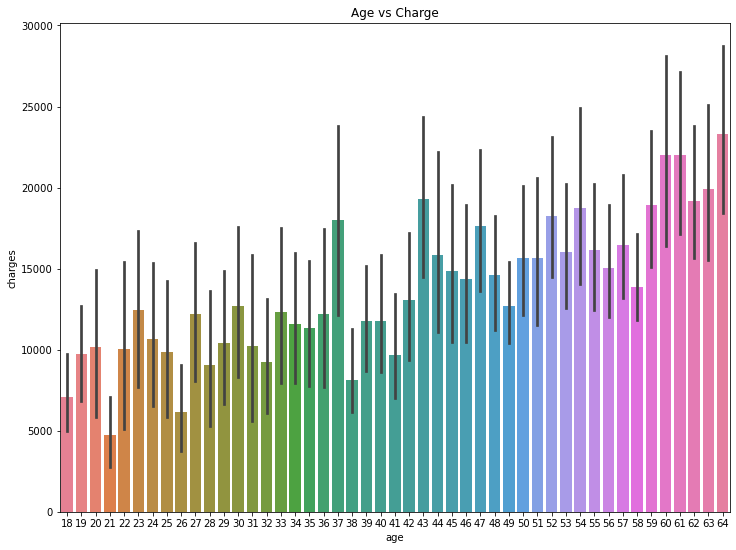

In [19]:
#univarite Analysis
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()


Male & Female

1    676
0    662
Name: sex, dtype: int64


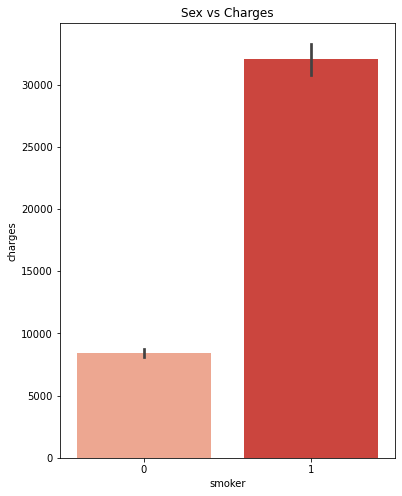

In [20]:
plt.figure(figsize=(6,8))
plt.title('Sex vs Charges')
sns.barplot(x='smoker',y='charges',data=df,palette='Reds')
print("Male & Female\n")
print(df['sex'].value_counts())
plt.show()


From above observation the total number of males is 676 and female is 662

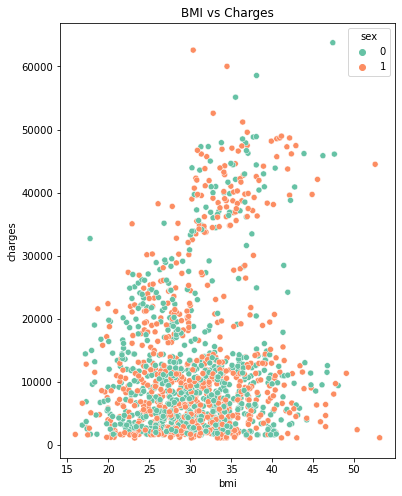

In [21]:
plt.figure(figsize=(6,8))
plt.title('BMI vs Charges')
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Set2')
plt.show()


# 

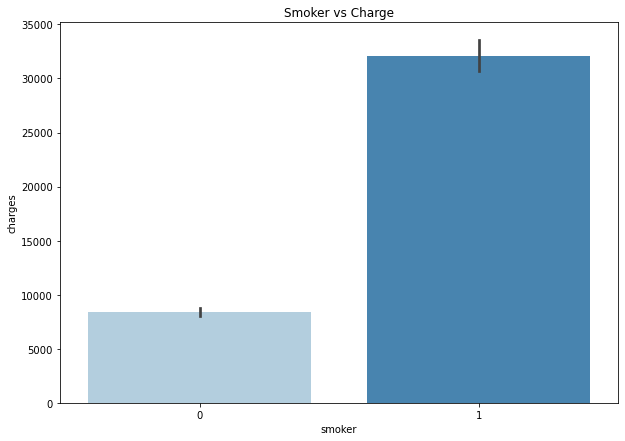

Non Smoker & smoker Count

0    1064
1     274
Name: smoker, dtype: int64


In [22]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues')
plt.show()

print("Non Smoker & smoker Count\n")
print(df['smoker'].value_counts())

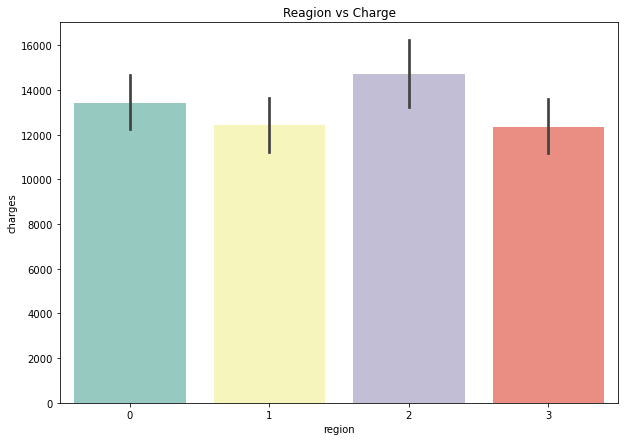

South,West,North,East, region count
 2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [23]:
plt.figure(figsize=(10,7))
plt.title('Reagion vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')
plt.show()
print("South,West,North,East, region count\n", df['region'].value_counts())

As per this region vs charge plot we can see here that charges are almost equal for every region

### Checking for outlier and and skewness of the data by plotting graph

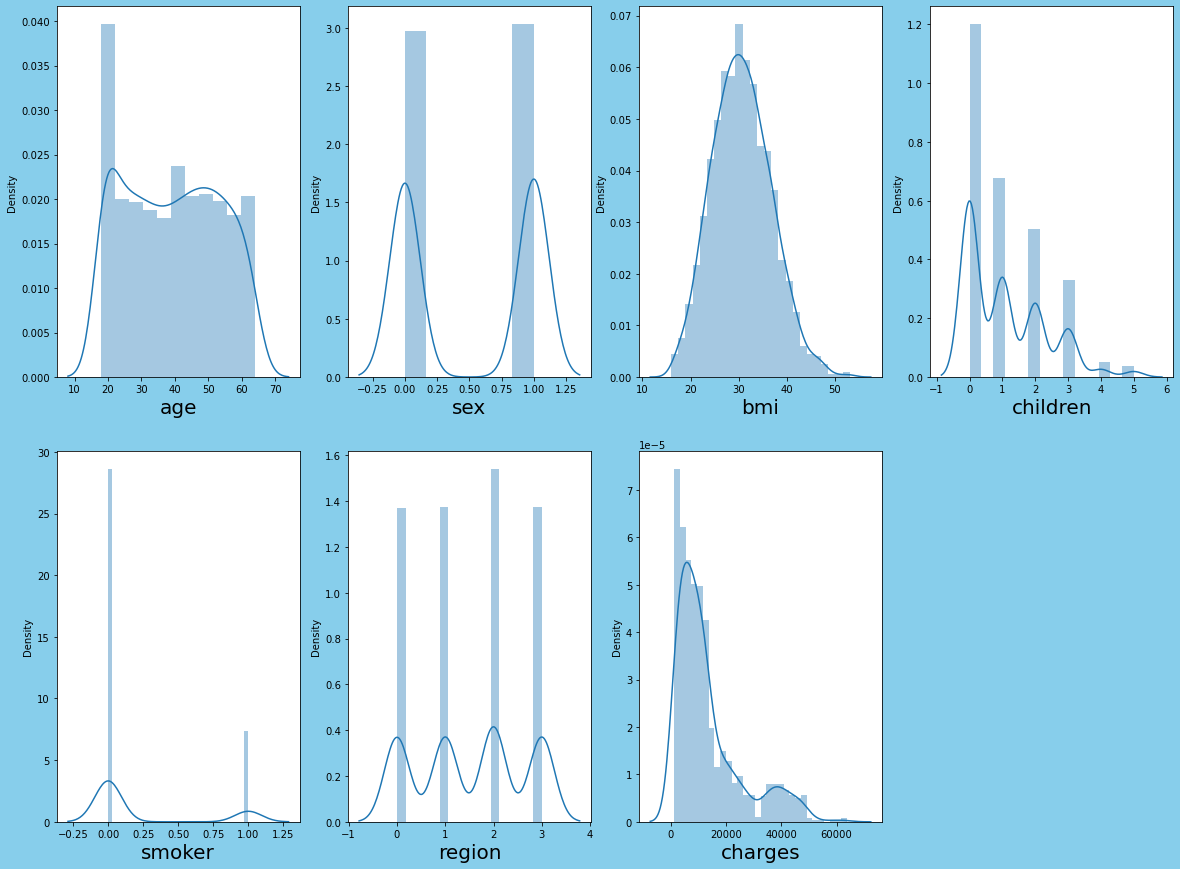

In [24]:
plt.figure(figsize=(20,15),facecolor='skyblue')
plot_number=1

for column in df:
    
    
    if plot_number<=8: 
        ax=plt.subplot(2,4,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.show()




Age,bmi are perfectly bell curved and since gender,smoker,regiona nd children are categorical data so we don't need to check for them

#### Seprating Features and Label variable

In [25]:
X=df.drop('charges',axis=1)
Y=df.charges

#### Plotting scatterplot to see the trend that features are follwing the label

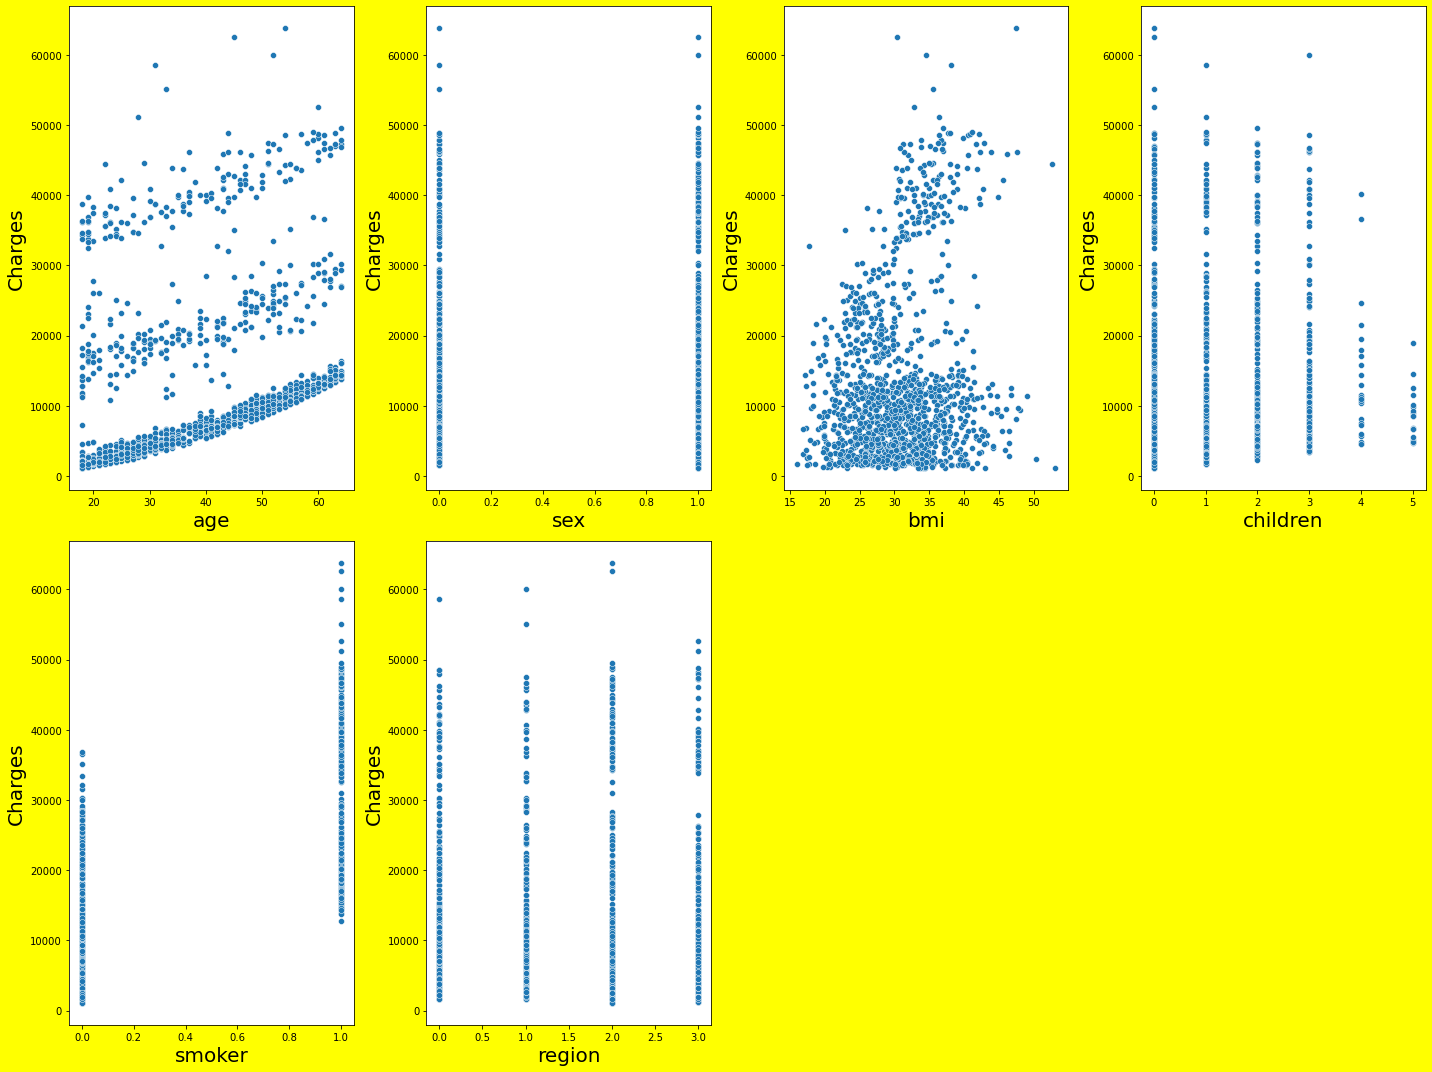

In [26]:
#visualise r/p
plt.figure(figsize=(20,15),facecolor='yellow')
plot_number=1

for column in X:
    if plot_number<=8: #any number can be written here,since we have 8 columns so i wrote 8
        ax=plt.subplot(2,4,plot_number)#row=2,column=4,subplot,if we have more graph to be plotted(subplot(row,column))
        sns.scatterplot(X[column],Y) #for scatterplot we need 2 variable
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Charges',fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()   #same as plt.show() 

 we can see that these all the features are positively related so we can add al the features Specially age,sex,bmi so these are 3 important features of the dataset

### Scaling the features


In [27]:
scaler=StandardScaler()

In [28]:
X_scaled=scaler.fit_transform(X)

In [29]:
X_scaled[0]

array([-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
        1.34390459])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

### For best random state

In [31]:
lr=LinearRegression()

In [37]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if(round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1)):
        print("At random_state",i,"the model performed very well")
        print("At random_state",i)
        print("Trainning Score",r2_score(y_train,pred_train)*100)
        print("Testing Score",r2_score(y_test,pred_test)*100,'\n\n')
    
    
    
    
      

At random_state 140 the model performed very well
At random_state 140
Trainning Score 75.02487073321402
Testing Score 75.02745129910471 


At random_state 142 the model performed very well
At random_state 142
Trainning Score 75.0551043472457
Testing Score 75.07201044529512 


At random_state 189 the model performed very well
At random_state 189
Trainning Score 74.96995043107657
Testing Score 75.03590667336192 


At random_state 229 the model performed very well
At random_state 229
Trainning Score 75.02786209711942
Testing Score 74.99136891769794 


At random_state 426 the model performed very well
At random_state 426
Trainning Score 74.98410028918391
Testing Score 75.01132278442812 


At random_state 465 the model performed very well
At random_state 465
Trainning Score 74.98938987077022
Testing Score 74.95959221836883 


At random_state 930 the model performed very well
At random_state 930
Trainning Score 75.00990940318783
Testing Score 75.03668634577832 




In [38]:
#choosing 503 best random state
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.20,random_state=229)

In [39]:
print('Size of x_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of x_train :  (1070, 6)
Size of y_train :  (1070,)
Size of x_test :  (268, 6)
Size of Y_test :  (268,)


###  Linear Regression 

In [40]:
#train the model
lr=LinearRegression()

In [98]:
lr.fit(x_train,y_train)
lr_train=lr.predict(x_train)
lr_test=lr.predict(x_test)
print("Training Accuracy for Linear Regression",r2_score(y_train,lr_train))
print("Testing Accuracy for Linear Regression",r2_score(y_test,lr_test))

Training Accuracy for Linear Regression 0.7540957786183357
Testing Accuracy for Linear Regression 0.7372604035811678


### RandomForestRegressor 

In [43]:
rfc=RandomForestRegressor()

In [44]:
rfc.fit(x_train,y_train)
rfc_train=rfc.predict(x_train)
rfc_test=rfc.predict(x_test)
print("Training Accuracy for Random Forest",r2_score(y_train,rfc_train))
print("Testing Accuracy for Random Forest",r2_score(y_test,rfc_test))

Training Accuracy for Random Forest 0.977937717891841
Testing Accuracy for Random Forest 0.8167311638137512


### DecisionTreeRegressor

In [45]:
dt=DecisionTreeRegressor()

In [46]:
dt.fit(x_train,y_train)
dt_train=dt.predict(x_train)
dt_test=dt.predict(x_test)
print("Training Accuracy for DecisionTreeRegressor",r2_score(y_train,dt_train))
print("Testing Accuracy for DecisionTreeRegressor",r2_score(y_test,dt_test))

Training Accuracy for DecisionTreeRegressor 0.999492977448744
Testing Accuracy for DecisionTreeRegressor 0.7013800918027471


In [99]:
svr=SVR()


In [101]:
svr.fit(x_train,y_train)
svr_train=svr.predict(x_train)
svr_test=svr.predict(x_test)
print("Training Accuracy for SVR",r2_score(y_train,svr_train))
print("Testing Accuracy for SVR",r2_score(y_test,svr_test))

Training Accuracy for SVR -0.0956917470207943
Testing Accuracy for SVR -0.07646221957953814


### Cross Valdation of the model

In [97]:
train_accuracy=r2_score(y_train,lr_train)
print("Train Acuracy for Linear Regression",train_accuracy)
test_accuracy=r2_score(y_test,lr_test)
print("Test Acuracy for Linear Regression",test_accuracy)


Train Acuracy for Linear Regression 0.7540957786183357
Test Acuracy for Linear Regression 0.7372604035811678


In [49]:
for i in range(2,10):
    cv_score=cross_val_score(lr,X_scaled,Y,cv=i)
    cv_mean=cv_score.mean()
    print("at Cross Fold",i,"the cv score is", cv_mean)
    print("accuracy score for training is", train_accuracy)
    print("for testing is",test_accuracy)
    print("\n")

at Cross Fold 2 the cv score is 0.7486033254037109
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 3 the cv score is 0.7448455049684157
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 4 the cv score is 0.7465374465214438
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 5 the cv score is 0.7472559473580954
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 6 the cv score is 0.7458863313669325
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 7 the cv score is 0.7452991860582022
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 8 the cv score is 0.7430633572874523
accuracy score for training is 0.7540957786183357
for testing is 0.7372604035811678


at Cross Fold 9 the cv score is 0.7432123

As Cv is not affecting so much so choosing cv=5 for the models

In [102]:
#checking for cross validation score
cv_1=cross_val_score(lr,X_scaled,Y,cv=5) #for linear regression
print("Cross Validation score for Linear",cv_1.mean())

Cross Validation score for Linear 0.7472559473580954


In [103]:
cv_2=cross_val_score(rfc,X_scaled,Y,cv=5) #for random forest
print("Cross Validation score for Random Forest",cv_2.mean())

Cross Validation score for Random Forest 0.8338616551335825


In [104]:
cv_3=cross_val_score(dt,X_scaled,Y,cv=5) #for decision Tree
print("Cross Validation score for Decision Tree",cv_3.mean())

Cross Validation score for Decision Tree 0.71335814477013


### Plotting curve for visualization 

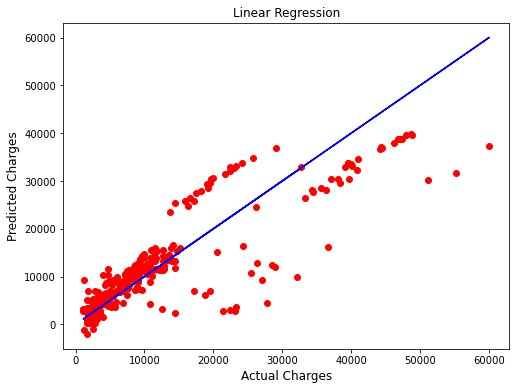

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=lr_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Charges",fontsize=12)
plt.ylabel("Predicted Charges",fontsize=12)
plt.title("Linear Regression")
plt.show()

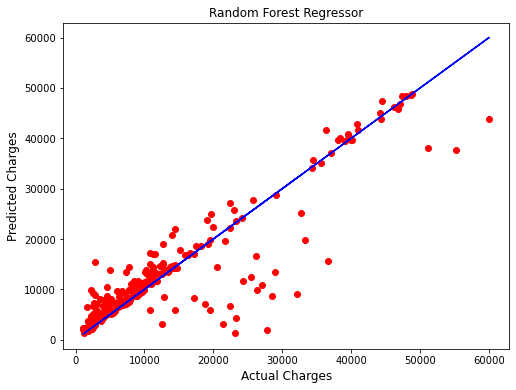

In [54]:
#for random Forest
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=rfc_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Charges",fontsize=12)
plt.ylabel("Predicted Charges",fontsize=12)
plt.title("Random Forest Regressor")
plt.show()

As per this curve Random Forest Regressor is giving the best fit line , best fit line is covering most of the datapoints which shows good fit of our model.
The equaion of best fit line is y=mx+c


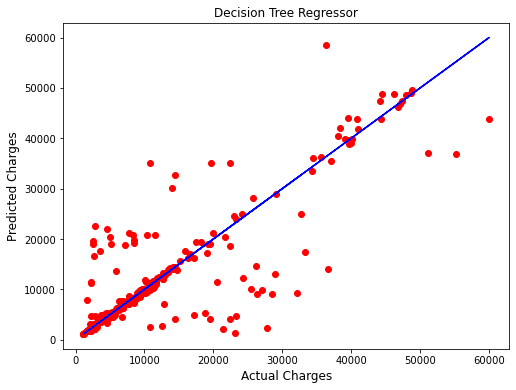

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=dt_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Charges",fontsize=12)
plt.ylabel("Predicted Charges",fontsize=12)
plt.title("Decision Tree Regressor")
plt.show()

### Regularization
##### To Check overfitting for our data

In [58]:
from sklearn.linear_model import Lasso, Ridge,LassoCV,RidgeCV

### Lasso 

In [66]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

In [67]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [83]:
#best Alpha parameters
alpha=lasscv.alpha_
alpha 
#now we got best parameter,letus use LAsso Regression & see how well our data has fitted before

1.6560851091827538

In [69]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.6560851091827538)

In [73]:
print("Lasso Regression score",lasso_reg.score(x_test,y_test))

Lasso Regression score 0.7372454293195663


In [74]:
print("Linear Regression Score",lr.score(x_test,y_test))

Linear Regression Score 0.7372604035811678


Since Linear Regression was giving almost same score that means our model was not overfitting the data

### Ridge Regression


In [76]:
ridgecv=RidgeCV(alphas=np.arange(.001,0.1,0.1),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001]), normalize=True)

In [77]:
ridgecv.alpha_

0.001

In [78]:
ridge_reg=Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [82]:
print("Linear Regression Score",lr.score(x_test,y_test))
print("Ridge Regression Score",ridge_reg.score(x_test,y_test))

Linear Regression Score 0.7372604035811678
Ridge Regression Score 0.7372603708290779


As ridge is also giving same accurace so we can use Linear Regression model for prediction

### Saving the Model 

In [87]:
import pickle

In [88]:
filename='insurance.pkl'

### Choosing the Linear Regresion Model as difference between Actual and Predicted accuracy is less and also We are getting our best fit line

In [94]:
pickle.dump(lr,open(filename,'wb'))

In [95]:
#conclusion
loaded_model=pickle.load(open('insurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

73.72604035811679


our final model is giving me 73% approx accuracy

In [92]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],lr_test[:]],index=['Predcited','Orignal'])

In [93]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predcited,5251.099368,12566.025098,9691.13858,29589.617517,23456.290104,3895.166659,16617.239352,12837.180631,7410.099243,12494.60708,...,7577.451905,3382.385224,11548.041952,11139.429991,4194.351957,16082.286529,15547.284638,12003.181307,11017.388825,32828.177557
Orignal,5251.099368,12566.025098,9691.13858,29589.617517,23456.290104,3895.166659,16617.239352,12837.180631,7410.099243,12494.60708,...,7577.451905,3382.385224,11548.041952,11139.429991,4194.351957,16082.286529,15547.284638,12003.181307,11017.388825,32828.177557
